# **House Pricing Prediction Using Regression**


> Name : Lee Hui Hui


> Matric number : 22004798/1


> Occurence : Occ 2


> Lecturer : Muhammad Shahreeza Safiruz Bin Kassim












### **Data Analysis**

In [288]:
#Importing libraries
import pandas as pd
import numpy as np
import json

#Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split

#Model building
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

#Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

pd.pandas.set_option('display.max_columns',0)

In [289]:
#Load dataset into a pandas dataframe
data = pd.read_csv('House Pricing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [290]:
#Check the shape of the data
#Find the number of rows and columns in dataset
print('Shape of the data:',data.shape)

Shape of the data: (545, 13)


In [291]:
#Check number of records in total and number of records that has NaN values
num_nan_rows = data.isnull().sum(axis=1).astype(bool).sum()
total_rows = data.shape[0]
data.dropna() #remove NaN values
total_rows_after_removing_nan = data.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}\nNumber of records after removing NaN values: {}'.format(total_rows, num_nan_rows, total_rows_after_removing_nan))

Number of records in total: 545
Number of records that has NaN values: 0
Number of records after removing NaN values: 545


In [292]:
#Print first 5 rows of data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [293]:
#Show list of columns name of dataset
print('List of columns name: {}'.format(data.columns))

List of columns name: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [294]:
#Show summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [295]:
#Check for missing values
print(data.isnull().sum())
#There is no missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [296]:
#Unique values in dataset
print(data.nunique().sort_values())
for col in data.columns:
    print('Unique values in {} column are:'.format(col))
    print(data[col].unique())

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64
Unique values in price column are:
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  

In [297]:
#Check the summary statistics of the data
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [298]:
#Get housing stats
total_houses=len(data)
max_value=data['price'].describe()['max']
min_value=data['price'].describe()['min']
print(json.dumps({
    'total_houses': total_houses,
    'max_value': max_value,
    'min_value': min_value,
}))

{"total_houses": 545, "max_value": 13300000.0, "min_value": 1750000.0}


In [299]:
#Correlation between various features in the dataset
#Find correlation between all data columns
correlation = data.corr()
correlation

<ipython-input-299-34930d48896b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

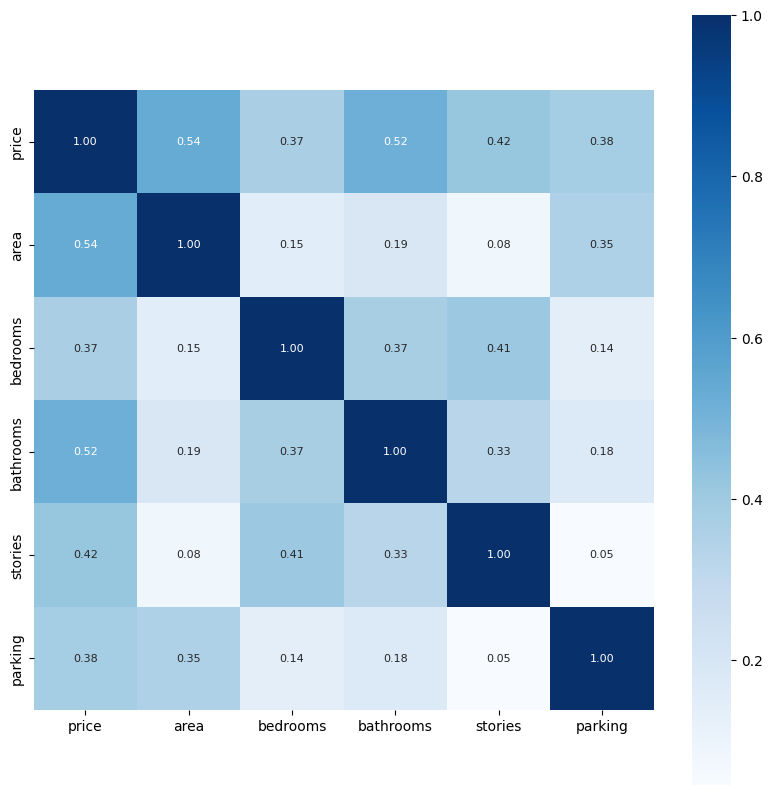

In [300]:
#Construct a heatmap to understand correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

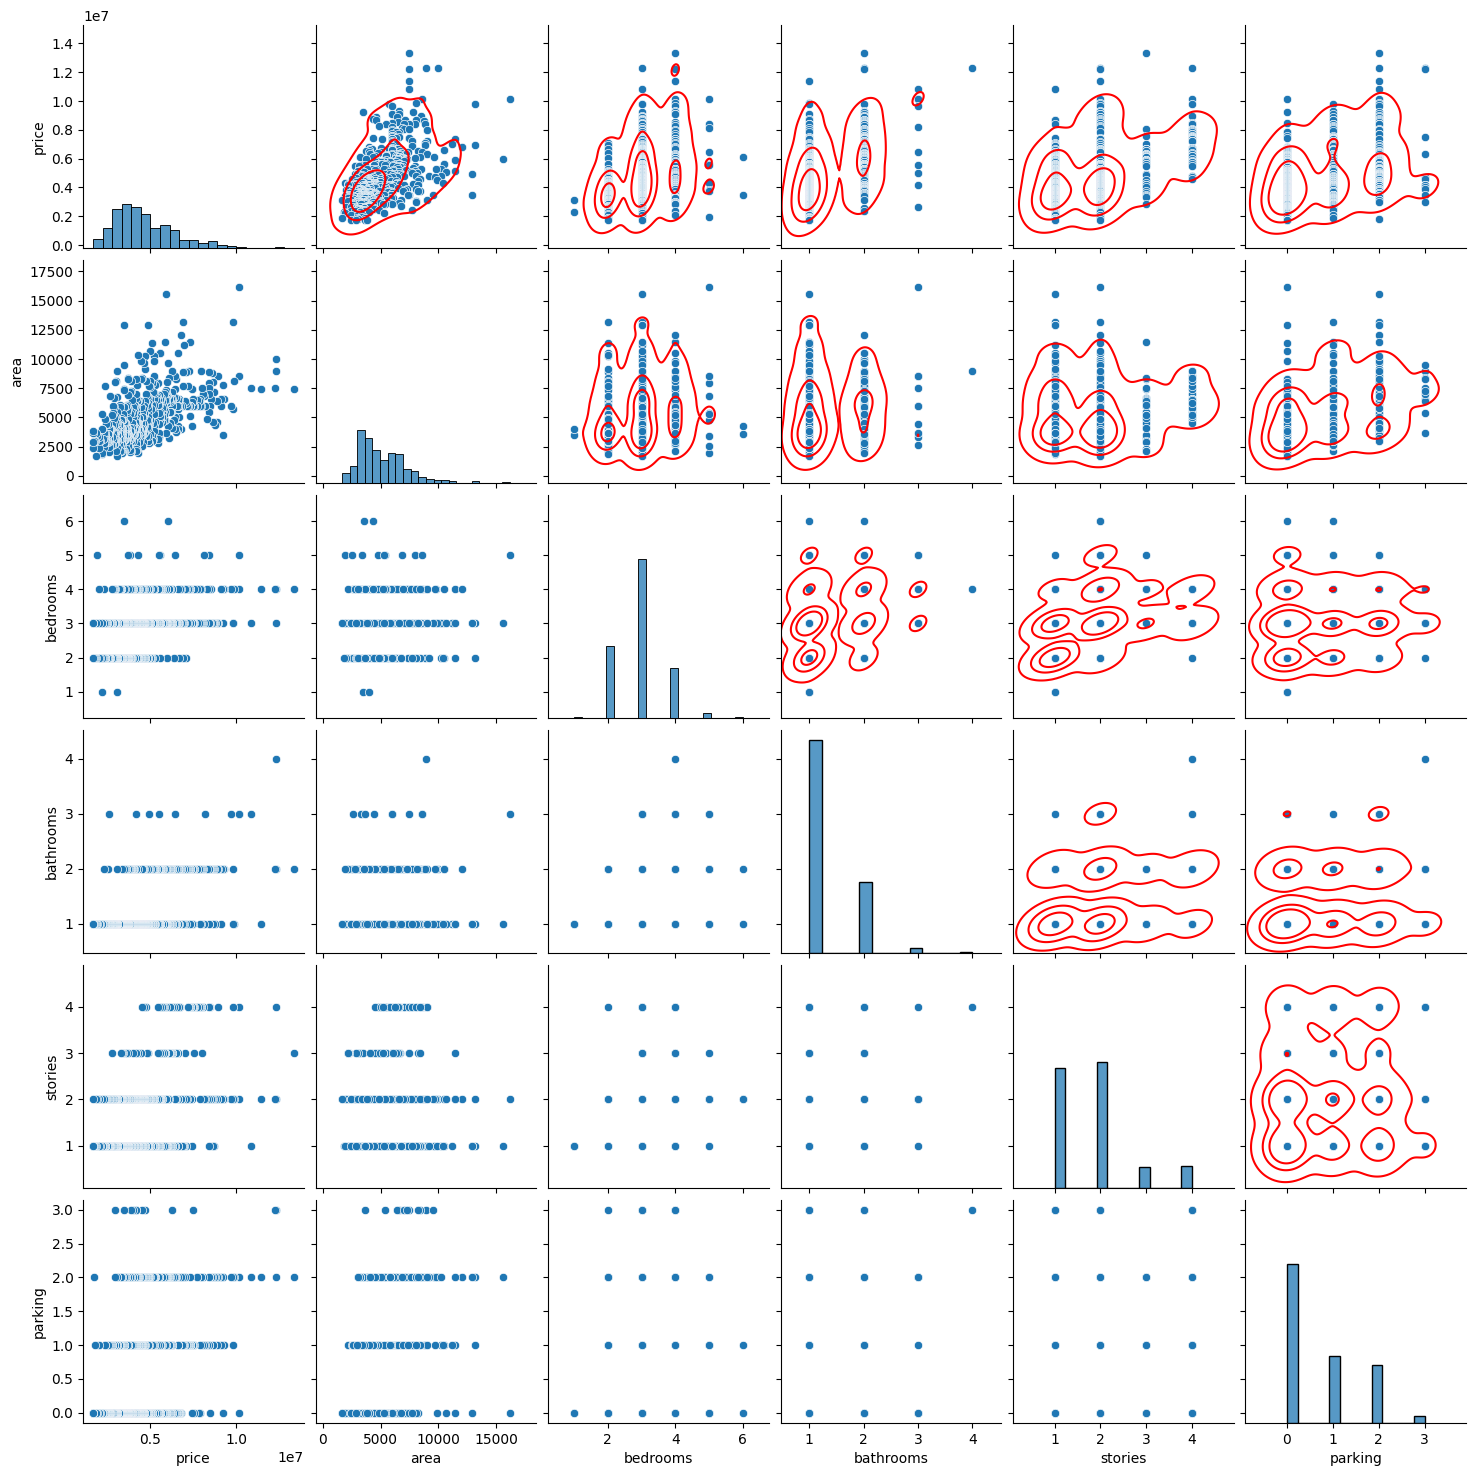

In [301]:
#Create a pairplot, kernel density estimate (KDE) visualize the distribution of a variable or the relationship between two variables in a pairwise manner
sns.pairplot(data).map_upper(sns.kdeplot, levels=4, color="red")

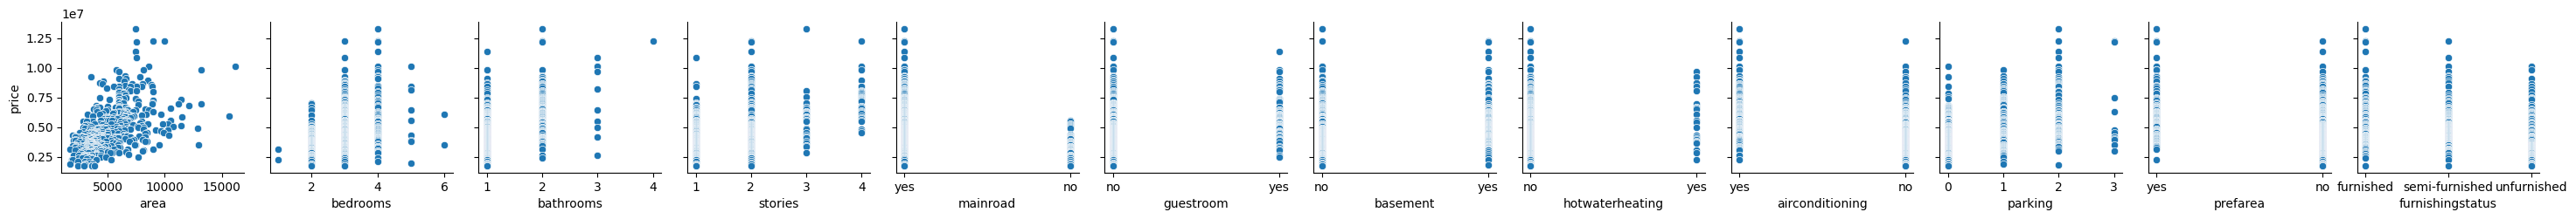

In [302]:
# Visualize the relationships between features and target variable
sns.pairplot(data, x_vars=data.drop(['price'], axis=1).columns, y_vars=['price'])
plt.show()

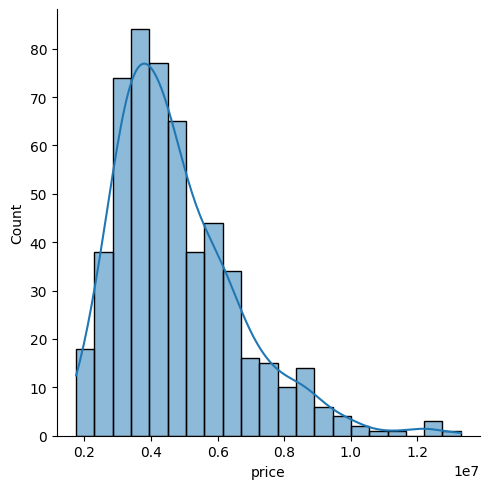

In [303]:
#Distribution of the target variable (Price)
sns.displot(data['price'], kde=True)
plt.show()
#The mode is at the fourth box

# **Data Preprocessing**

Check for missing values

In [304]:
print('Number of missing values:\n')
data.isnull().sum()
#There is no missing values

Number of missing values:



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [305]:
# Drop the rows with missing values
data.dropna(inplace=True)

Check for duplicates

In [306]:
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = sum(duplicates)

if num_duplicates > 0:
    # Remove duplicate rows
    data.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


Change non numerical value to numerical value

In [307]:
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

In [308]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


Remove outliers

In [309]:
z_scores = np.abs(stats.zscore(data))
min_threshold = 2.5
max_threshold = 3
print('Number of rows after removing outliers using 2.5 std dev: {}'.format(data[(z_scores < min_threshold).all(axis=1)].shape[0]))
print('Number of rows after removing outliers using 3 std dev: {}'.format(data[(z_scores < max_threshold).all(axis=1)].shape[0]))
print('Number of rows that are within std dev 2.5 to 3: {}'.format(abs(data[(z_scores < min_threshold).all(axis=1)].shape[0]- data[(z_scores < max_threshold).all(axis=1)].shape[0])))

data = data[(z_scores < min_threshold).all(axis=1)]
print('Number of rows remaining in the dataset after removing the outliers:', data.shape[0])

Number of rows after removing outliers using 2.5 std dev: 438
Number of rows after removing outliers using 3 std dev: 499
Number of rows that are within std dev 2.5 to 3: 61
Number of rows remaining in the dataset after removing the outliers: 438


Normalizing numerical features

In [310]:
scaler = MinMaxScaler()
data['id'] = [i for i in range(len(data))]
id = data.pop('id')
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_normalized = pd.concat([data_normalized, id.reset_index(drop=True)], axis=1)
last_col = data_normalized.pop(data_normalized.columns[-1])
data_normalized.insert(0, last_col.name, last_col)
data_normalized.head(10)

<ipython-input-310-c0173428a59a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = [i for i in range(len(data))]


,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,1.000000,0.553672,1.0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,0.5,1.0,0.5
1,1,0.990741,0.694915,0.5,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5
2,2,0.972222,0.491525,1.0,0.0,0.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5
3,3,0.972222,0.559322,1.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0
4,4,0.944444,0.333333,0.5,1.0,0.5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
5,5,0.939815,0.538983,0.5,1.0,0.5,1.0,0.0,0.0,0.0,1.0,0.5,1.0,0.5
6,6,0.916667,0.622034,0.5,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7,7,0.912037,0.723164,0.5,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0
8,8,0.912037,0.328814,0.5,1.0,0.5,1.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0
9,9,0.902778,0.807910,0.5,1.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [311]:
data_normalized.to_csv('cleaned_data_house.csv', index=False)

In [312]:
#Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(data_normalized.drop("price", axis=1), data_normalized["price"], test_size=0.2, random_state=42)

# **Regression Model Development**

Linear Regression

In [313]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred2 = regressor.predict(X_train)

Display Coefficient and Intercept

In [ ]:
#Check current coefficient generated
print("Coefficient: \n",regressor.coef_)

print("\n")

#Check intercept
print("Intercept: \n",regressor.intercept_)

Coefficient: 
 [-1.35713222e-03  2.41752522e-02  1.87132090e-03  3.64064540e-02
  8.46168079e-04 -2.31695560e-03  2.02127821e-02 -8.85545307e-03
 -1.73472348e-18  1.63859413e-02  6.90167572e-03  6.13493706e-03
 -9.86717302e-03]


Intercept: 
 0.6241950736991275


# **Model evaluation**

---------------------------------------------------
Training Set Metrics
---------------------------------------------------
Mean Squared Error: 0.0035782652082333444
Root Mean Squared Error: 0.059818602526583185
Mean absolute error: 0.03833860162114039
R-squared: 0.9000366702523793
Residual Sum of Squares: 1.2523928228816705
---------------------------------------------------


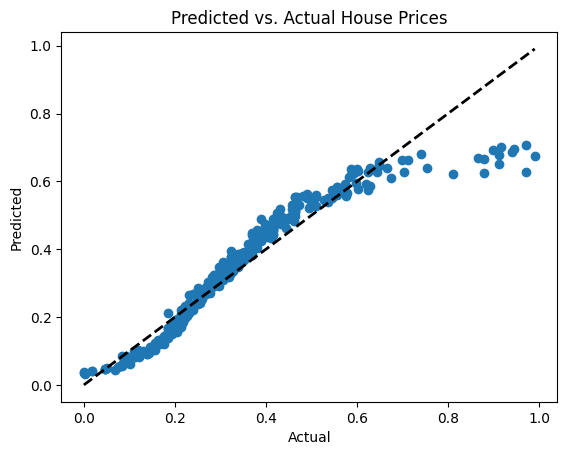

In [314]:
#Check evaluation metrices for Training Set
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
mse = mean_squared_error(y_train, y_pred2)
rmse=np.sqrt(mean_squared_error(y_train, y_pred2))
mae = mean_absolute_error(y_train, y_pred2)
r2 = r2_score(y_train, y_pred2)
rss=np.sum(np.square(y_train-y_pred2))

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",rmse)
print('Mean absolute error:', mae)
print("R-squared:", r2)
print("Residual Sum of Squares:",rss)
print('---------------------------------------------------')
# Plot predicted vs. actual house prices
plt.scatter(y_train, y_pred2)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()

---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
Mean Squared Error: 0.003416820436051435
Root Mean Squared Error: 0.058453575049362334
Mean absolute error: 0.040719064550691075
R-squared: 0.9250845756729766
Residual Sum of Squares: 0.3006801983725263
---------------------------------------------------


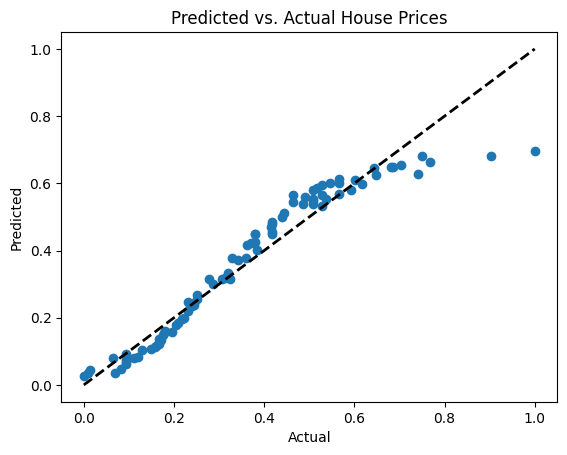

In [315]:
#Check evaluation metric for Testing Set
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')

mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rss=np.sum(np.square(y_test-y_pred))

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",rmse)
print('Mean absolute error:', mae)
print("R-squared:", r2)
print("Residual Sum of Squares:",rss)
print('---------------------------------------------------')
# Plot predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()

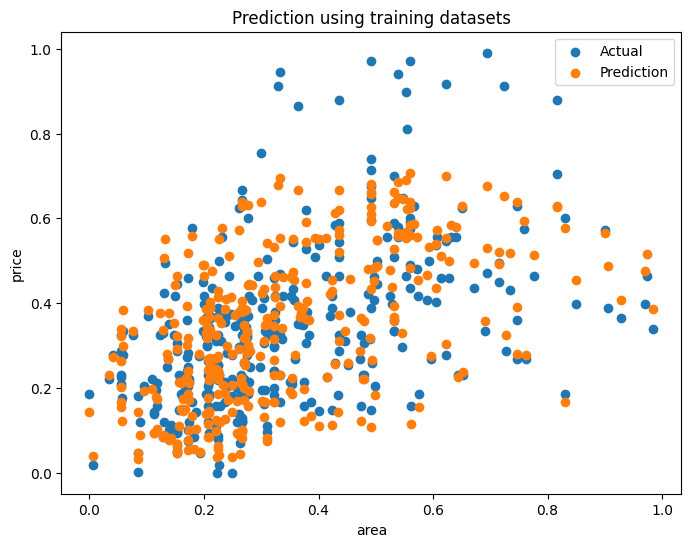

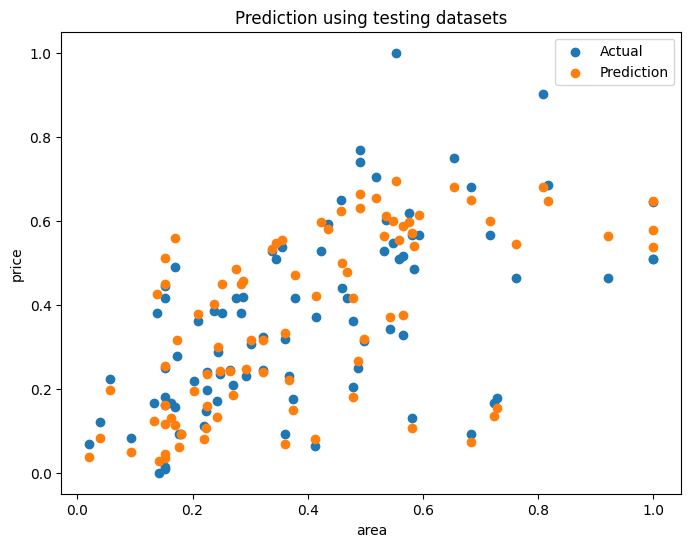

In [ ]:
#To show scatter plot of actual and prediction in a same plane for easy visualisation 

plt.figure(figsize=[8,6])  
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= X_train['area'], label='Actual')
plt.scatter(y=y_pred2, x= X_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

print("\n")
plt.figure(figsize=[8,6])  
plt.title('Prediction using testing datasets')
plt.scatter(y= y_test, x= X_test['area'], label='Actual')
plt.scatter(y=y_pred, x= X_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

Hyperparameter

Lasso (L1 Regularization + Grid Seach CV)

In [317]:
#Carry out Fine tuning with L1 regularization
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Declare L1 for Lasso model
L1=linear_model.Lasso()

#State a list of alpha paramater as Grid Search CV requires us to give a set of parameters 
params = {'alpha': [0.00001,0.0001,0.001,0.01, 0.1, 1, 10]}
L1_search = GridSearchCV(L1, param_grid=params, scoring='r2')
L1_search.fit(X_train, y_train)

# Get the best hyperparameters and fit the model
best_params = L1_search.best_params_
L1.set_params(**best_params).fit(X_train, y_train)

#Predict the price for trainn and testing with newly fitted model
predLsTrain=L1.predict(X_train)
predLsTest=L1.predict(X_test)

#This method will get the same output as a bove.
#However, I predicted using L1 bcs lasso is my optimization model while grid search helps me find the best parameter
#predLsTrain=L1_search.predict(X_train)
#predLsTest=L1_search.predict(X_test)

#Calculate the best mse,rmse,mae,r2
mse = mean_squared_error(y_test, predLsTest)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - predLsTest))
r2 = L1_search.score(X_test, y_test)

#Display them 
print('After Lasso (L1 Regularization)')
print('Best alpha:', L1_search.best_params_['alpha'])
print(f'Best MSE: {mse:.15f}')
print(f'Best RMSE: {rmse:.15f}')
print(f'Best MAE: {mae:.15f}')
print(f'Best R-squared: {r2:.15f}')

#As we can see below, the best alpha is 0.001 for this model. 
#The value R2 score is a slight decrease because the Regularization L1 is expected to reduce some of features (exp: coefficient decrease to 0) due to introduction of penalty term



After Lasso (L1 Regularization)
Best alpha: 0.001
Best MSE: 0.003491546370925
Best RMSE: 0.059089308431605
Best MAE: 0.041047412210544
Best R-squared: 0.923446173765680


*Evaluation after L1 regularisation*

L1 Regularization(Lasso) + Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
Mean Squared Error: 0.003649161989077548
Root Mean Squared Error: 0.06040829404210607
Mean absolute error: 0.03895145147678518
R-squared: 0.8980560796954616
Residual Sum of Squares: 1.2772066961771418
---------------------------------------------------


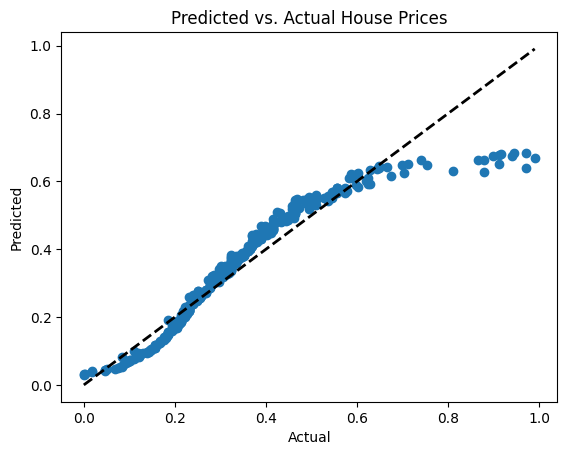

In [319]:
#Check evaluation metrices for Training Set
print('L1 Regularization(Lasso) + Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
mse = mean_squared_error(y_train, predLsTrain)
rmse=np.sqrt(mean_squared_error(y_train, predLsTrain))
mae = mean_absolute_error(y_train, predLsTrain)
r2 = r2_score(y_train, predLsTrain)
rss=np.sum(np.square(y_train-predLsTrain))

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",rmse)
print('Mean absolute error:', mae)
print("R-squared:", r2)
print("Residual Sum of Squares:",rss)
print('---------------------------------------------------')
# Plot predicted vs. actual house prices
plt.scatter(y_train,predLsTrain)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()

---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
Mean Squared Error: 0.0034915463709253945
Root Mean Squared Error: 0.05908930843160541
Mean absolute error: 0.04104741221054384
R-squared: 0.9234461737656802
Residual Sum of Squares: 0.3072560806414347
---------------------------------------------------


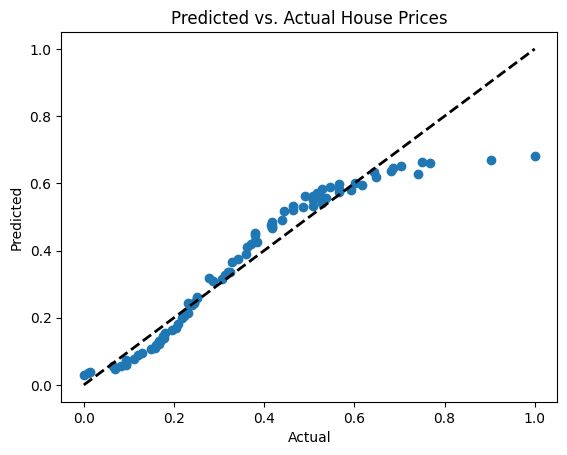

In [320]:
#Check evaluation metric for Testing Set
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')

mse = mean_squared_error(y_test, predLsTest)
rmse=np.sqrt(mean_squared_error(y_test, predLsTest))
mae = mean_absolute_error(y_test, predLsTest)
r2 = r2_score(y_test, predLsTest)
rss=np.sum(np.square(y_test-predLsTest))

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",rmse)
print('Mean absolute error:', mae)
print("R-squared:", r2)
print("Residual Sum of Squares:",rss)
print('---------------------------------------------------')
# Plot predicted vs. actual house prices
plt.scatter(y_test, predLsTest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()


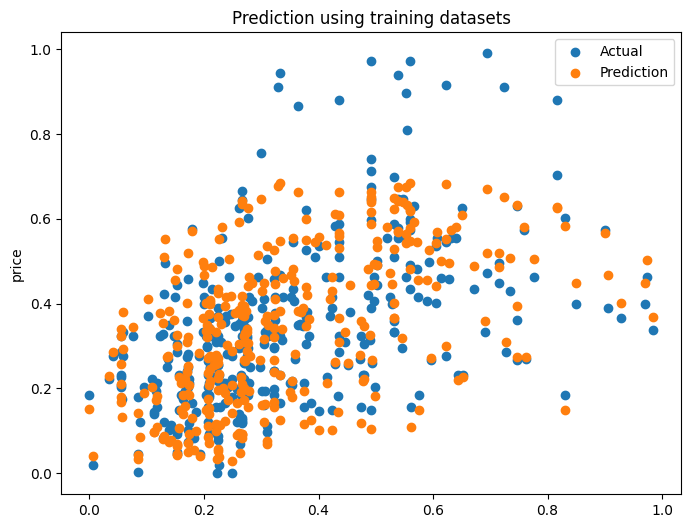

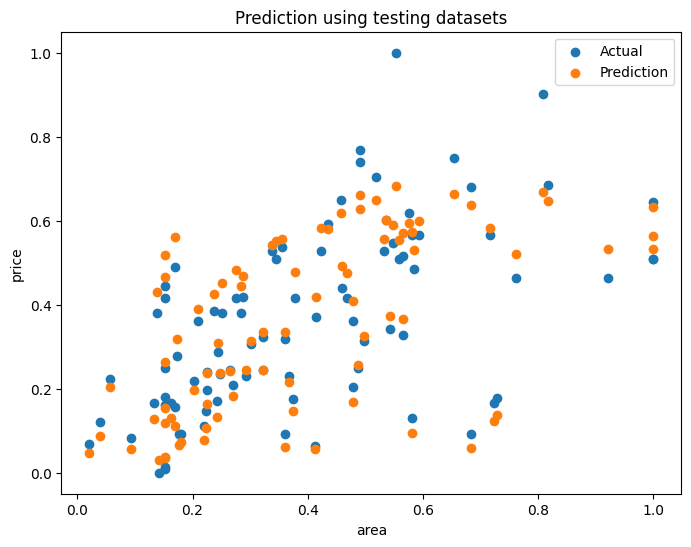

In [321]:
#To show scatter plot of actual and prediction in a same plane for easy visualisation 

plt.figure(figsize=[8,6])  
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= X_train['area'], label='Actual')
plt.scatter(y=predLsTrain, x= X_train['area'], label='Prediction')
plt.ylabel('price')  
plt.legend()
plt.show()

print("\n")
plt.figure(figsize=[8,6])  
plt.title('Prediction using testing datasets')
plt.scatter(y= y_test, x= X_test['area'], label='Actual')
plt.scatter(y=predLsTest, x= X_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

Rigrid(L2 regularization)+Grid Search CV





In [323]:
# L2 regularzation +Grid Search CV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the hyperparameters to tune
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create the linear regression model with Ridge regularization
L2 = Ridge()

# Use grid search to find the best hyperparameters
L2_search = GridSearchCV(L2, params, cv=5, scoring='r2')
L2_search.fit(X_train, y_train)

# Get the best hyperparameters and fit the model
best_params = L2_search.best_params_
L2.set_params(**best_params).fit(X_train, y_train)

# Evaluate the model on the test set
predRgTrain=L2.predict(X_train)
predRgTest=L2.predict(X_test)

#Get best mse,rmse,mae.r2
mse = mean_squared_error(y_test, predRgTest)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - predRgTest))
r2 = L2.score(X_test, y_test)

print('After Rigrid (L2 Regularization)')
print(f'Best hyperparameters: {best_params}')
print(f'Best test MSE: {mse:.15f}')
print(f'Best test RMSE: {rmse:.15f}')
print(f'Best test MAE: {mae:.15f}')
print(f'Best test R-squared: {r2:.15f}')


After Rigrid (L2 Regularization)
Best hyperparameters: {'alpha': 10}
Best test MSE: 0.003433668606911
Best test RMSE: 0.058597513658097
Best test MAE: 0.040794067365807
Best test R-squared: 0.924715171458535


L2 Regularization(Rigrid) + Grid Search CV
---------------------------------------------------
Training Set Metrics
---------------------------------------------------
Mean Squared Error: 0.003592389395477312
Root Mean Squared Error: 0.059936544740895034
Mean absolute error: 0.03846839036139513
R-squared: 0.8996420933541558
Residual Sum of Squares: 1.2573362884170591
---------------------------------------------------


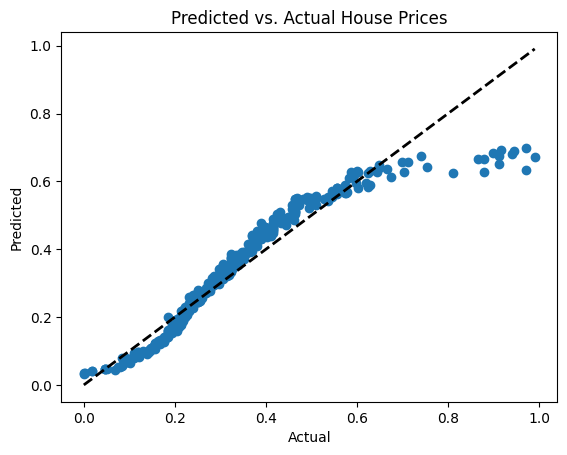

In [325]:
#Check evaluation metrices for Training Set
print('L2 Regularization(Rigrid) + Grid Search CV')
print('---------------------------------------------------')
print('Training Set Metrics')
print('---------------------------------------------------')
mse = mean_squared_error(y_train, predRgTrain)
rmse=np.sqrt(mean_squared_error(y_train, predRgTrain))
mae = mean_absolute_error(y_train, predRgTrain)
r2 = r2_score(y_train, predRgTrain)
rss=np.sum(np.square(y_train-predRgTrain))

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",rmse)
print('Mean absolute error:', mae)
print("R-squared:", r2)
print("Residual Sum of Squares:",rss)
print('---------------------------------------------------')
# Plot predicted vs. actual house prices
plt.scatter(y_train,predRgTrain)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()


---------------------------------------------------
Testing Set Metrics
---------------------------------------------------
Mean Squared Error: 0.0034336686069108367
Root Mean Squared Error: 0.05859751365809676
Mean absolute error: 0.0407940673658069
R-squared: 0.9247151714585353
Residual Sum of Squares: 0.30216283740815364
---------------------------------------------------


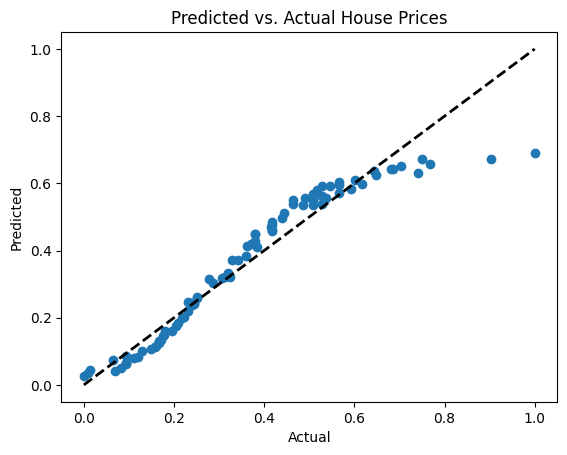

In [326]:
#Check evaluation metric for Testing Set
print('---------------------------------------------------')
print('Testing Set Metrics')
print('---------------------------------------------------')

mse = mean_squared_error(y_test, predRgTest)
rmse=np.sqrt(mean_squared_error(y_test, predRgTest))
mae = mean_absolute_error(y_test, predRgTest)
r2 = r2_score(y_test, predRgTest)
rss=np.sum(np.square(y_test-predRgTest))

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",rmse)
print('Mean absolute error:', mae)
print("R-squared:", r2)
print("Residual Sum of Squares:",rss)
print('---------------------------------------------------')
# Plot predicted vs. actual house prices
plt.scatter(y_test, predRgTest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual House Prices')
plt.show()


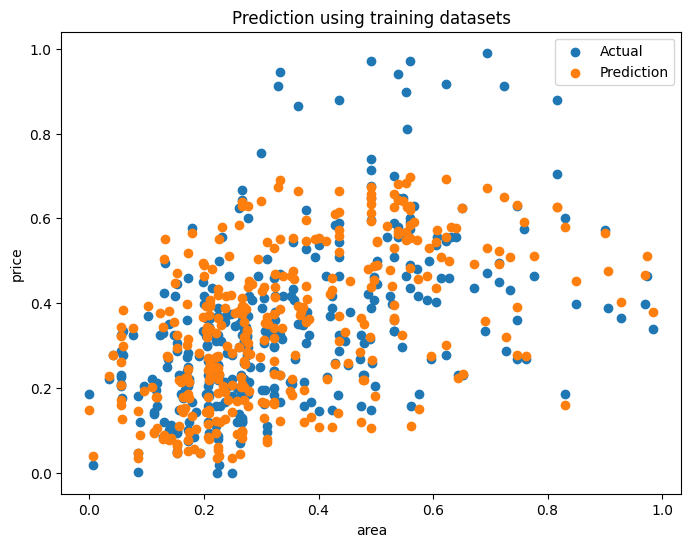

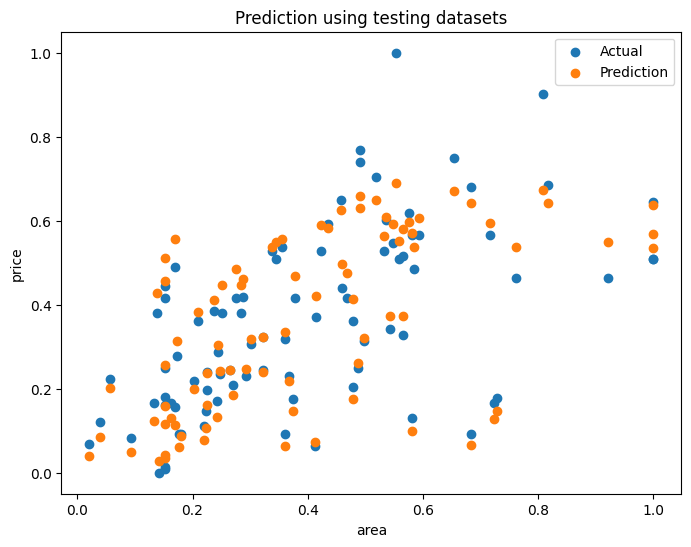

In [327]:
#Scatter plot to see the comparison od actual and predicted value after optimization of hyperparameter
#Training set (L1 Regularisation+Grid Search CV)
plt.figure(figsize=[8,6])  
plt.title('Prediction using training datasets')
plt.scatter(y= y_train, x= X_train['area'], label='Actual')
plt.scatter(y=predRgTrain, x= X_train['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()

print('\n')

#Training set (L2 Regularisation+Grid Search CV)
plt.figure(figsize=[8,6])  
plt.title('Prediction using testing datasets')
plt.scatter(y= y_test, x= X_test['area'], label='Actual')
plt.scatter(y=predRgTest, x= X_test['area'], label='Prediction')
plt.xlabel('area')                       
plt.ylabel('price')  
plt.legend()
plt.show()